In [2]:
from osgeo import gdal, gdal_array
import numpy as np
import matplotlib.pyplot as plt
import os

pastaDEM =  (r'C:\Users\Gierre\Desktop\Rasters\MDEs')
os.chdir(pastaDEM)
dados = gdal.Open('AP_05061_FBS_F7150_RT1.dem.tif')
geotransform = dados.GetGeoTransform() 
projecao = dados.GetProjection() 

In [3]:
print(dados.RasterCount) 

1


In [4]:
banda = dados.GetRasterBand(1) 
array=banda.ReadAsArray() 

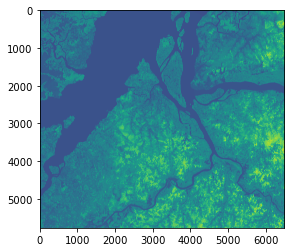

In [5]:
plt.figure
plt.imshow(array)

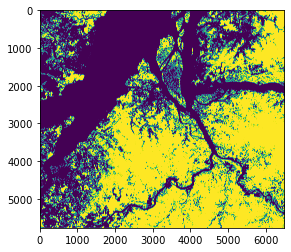

In [6]:
mascara_binaria = np.where((array >= np.mean(array)),1,0)
plt.figure()
plt.imshow(mascara_binaria)

In [7]:
driver = gdal.GetDriverByName("GTiff")
driver.Register()
outds = driver.Create("mascara_binaria.tif", xsize = mascara_binaria.shape[1], ysize = mascara_binaria.shape[0], bands = 1, 
                      eType = gdal.GDT_Int16)
outds.SetGeoTransform(geotransform)
outds.SetProjection(projecao)
outband = outds.GetRasterBand(1)
outband.WriteArray(mascara_binaria)
outband.SetNoDataValue(np.nan)
outband.FlushCache()
outband = None
outds = None